# Chicago Crime Rates #

We would ultimately like to identify where the most crime rates happen throughout Chicago on a map that can be visualized. We can only use the data from 2012, as the CSV file is too big for JupyterHub to handle.

In [1]:
# import pandas, seaborn, numpy, and matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# importing datetime modules
from datetime import date
from datetime import time
import datetime

# importing calendar
import calendar

In [2]:
# Reading the CSV file to understand how the formatting looks from importing
df = pd.read_csv("test.csv", index_col = "ID", parse_dates = ["Date"])
df = df.dropna()

# Creating the 'Time' variable for the dataframe df
df['Date'] = df['Date'].astype(str)
time = df.Date.str.slice(-8,-3)

# Creating the 'Date' variable for dataframe df
date = df.Date.str.slice(0,11)

# Adding 2 new columns to df called 'Time' and 'Date_Refurbished'
df['Time'] = time
df['Date_Refurbished'] = date

# Changing datatypes of 'Date' and 'Time' columns
df['Date_Refurbished'] = pd.to_datetime(df['Date_Refurbished'])

# Changing ALL Column Names because spaces suck
df.rename(columns={'Primary Type':'Primary_Type', 'Case Number':'Case_Number', 'Location Description':'Location_Description', 'Community Area':'Community_Area', 'FBI Code':'FBI_Code', 'X Coordinate':'X_Coordinate', 'Y Coordinate':'Y_Coordinate',}, inplace = True)

# Dropping "Updated On" and "Unnamed: 0" column as we do not see a use for it
del df["Updated On"]
del df["Unnamed: 0"]

# Display the first few rows of the DataFrame
df.head()

,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,...,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Latitude,Longitude,Location,Time,Date_Refurbished
ID,,,,,,,,,,,,,,,,,,,,,
10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022.0,...,29.0,08B,1154907.0,1893681.0,2016.0,41.864073,-87.706819,"(41.864073157, -87.706818608)",23:40,2016-05-03
10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313.0,...,42.0,08B,1183066.0,1864330.0,2016.0,41.782922,-87.604363,"(41.782921527, -87.60436317)",21:40,2016-05-03
10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524.0,...,25.0,24,1140789.0,1904819.0,2016.0,41.894908,-87.758372,"(41.894908283, -87.758371958)",23:31,2016-05-03
10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,False,1532.0,...,25.0,08B,1143223.0,1901475.0,2016.0,41.885687,-87.749516,"(41.885686845, -87.749515983)",22:10,2016-05-03
10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523.0,...,25.0,6,1139890.0,1901675.0,2016.0,41.886297,-87.761751,"(41.886297242, -87.761750709)",22:00,2016-05-03


In [3]:
# Want to see the information for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17816 entries, 10508693 to 10538192
Data columns (total 22 columns):
Case_Number             17816 non-null object
Date                    17816 non-null object
Block                   17816 non-null object
IUCR                    17816 non-null object
Primary_Type            17816 non-null object
Description             17816 non-null object
Location_Description    17816 non-null object
Arrest                  17816 non-null object
Domestic                17816 non-null object
Beat                    17816 non-null float64
District                17816 non-null float64
Ward                    17816 non-null float64
Community_Area          17816 non-null float64
FBI_Code                17816 non-null object
X_Coordinate            17816 non-null float64
Y_Coordinate            17816 non-null float64
Year                    17816 non-null float64
Latitude                17816 non-null float64
Longitude               17816 non-null float6

['BATTERY' 'PUBLIC PEACE VIOLATION' 'THEFT' 'WEAPONS VIOLATION' 'ROBBERY'
 'MOTOR VEHICLE THEFT' 'ASSAULT' 'OTHER OFFENSE' 'DECEPTIVE PRACTICE'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'BURGLARY' 'STALKING'
 'CRIM SEXUAL ASSAULT' 'NARCOTICS' 'SEX OFFENSE' 'HOMICIDE'
 'OFFENSE INVOLVING CHILDREN' 'INTERFERENCE WITH PUBLIC OFFICER'
 'PROSTITUTION' 'KIDNAPPING' 'GAMBLING' 'INTIMIDATION' 'ARSON'
 'LIQUOR LAW VIOLATION' 'OBSCENITY' 'NON-CRIMINAL' 'PUBLIC INDECENCY'
 'HUMAN TRAFFICKING']
29


THEFT                               3759
BATTERY                             3576
CRIMINAL DAMAGE                     2106
ASSAULT                             1330
NARCOTICS                           1320
OTHER OFFENSE                       1114
DECEPTIVE PRACTICE                   924
BURGLARY                             905
ROBBERY                              715
MOTOR VEHICLE THEFT                  613
CRIMINAL TRESPASS                    455
WEAPONS VIOLATION                    275
OFFENSE INVOLVING CHILDREN           162
PUBLIC PEACE VIOLATION               117
CRIM SEXUAL ASSAULT                  103
INTERFERENCE WITH PUBLIC OFFICER      67
PROSTITUTION                          57
SEX OFFENSE                           55
HOMICIDE                              54
ARSON                                 38
LIQUOR LAW VIOLATION                  16
GAMBLING                              16
KIDNAPPING                            13
INTIMIDATION                          11
STALKING        

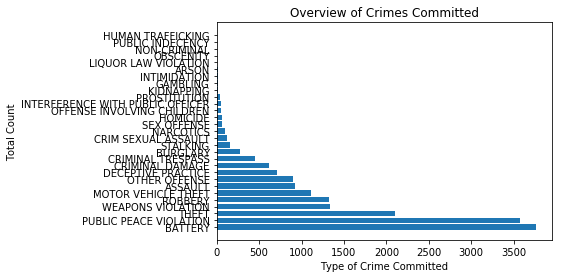

In [4]:
# Creating a bar chart showing the count of different types of crimes in Chicago
# I have to identify the unique values that are in the column "Year"
x_unique = df.Primary_Type.unique()
print(x_unique)
print(len(x_unique))

# Show initial bar chart of 'Primary_Type's of crimes in Chicago
plt.barh(x_unique, df['Primary_Type'].value_counts())
plt.xlabel('Type of Crime Committed')
plt.ylabel('Total Count')
plt.title('Overview of Crimes Committed')

# Value counts for each x_unique identifiers
df['Primary_Type'].value_counts()

Text(0.5,1,'Crimes that have happened 500+ Times')

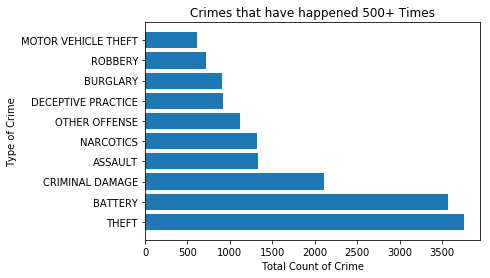

In [5]:
# Value counts for each x_unique identifier greater than 500
x_unique_500 = df['Primary_Type'].value_counts()[df['Primary_Type'].value_counts()>500]

# Create dataframe for x_unique_500 variable
df_2 = pd.DataFrame(x_unique_500)

# Renaming Index and Column for df_2 dataframe
df_2.index.rename('Primary_Type', inplace=True)
df_2.rename(columns={'Primary_Type':'Total_Count'}, inplace=True)

# Horizontal plot showing the values that are greater than 500
plt.barh(df_2.index.values,df_2['Total_Count'])
plt.xlabel('Total Count of Crime')
plt.ylabel('Type of Crime')
plt.title('Crimes that have happened 500+ Times')

We want to only show the primary types of crime that were document more than 500 times. Below, we are going to create a plot showing the primary types of crime that were documented less than 500 times.

Text(0.5,1,'Crimes that have happened 500+ Times')

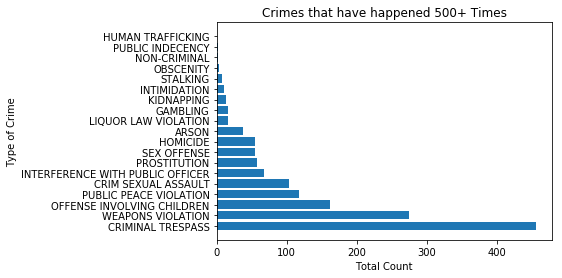

In [6]:
# Creating a new variable that has all 'Primary_Types' less than 500 times documented
x_unique_500_1 = df['Primary_Type'].value_counts()[df['Primary_Type'].value_counts()<500]

# Creating a new DataFrame with the x_unique_500_1 variable
df_3 = pd.DataFrame(x_unique_500_1)

# Renaming the Index and Column for df_3 dataframe
df_3.index.rename('Primary_Type', inplace=True)
df_3.rename(columns={'Primary_Type':'Total_Count'}, inplace=True)

# Plotting df_3 with a horizontal bar chart
plt.barh(df_3.index.values,df_3['Total_Count'])
plt.xlabel('Total Count')
plt.ylabel('Type of Crime')
plt.title('Crimes that have happened 500+ Times')

### Visualized the locations of crimes throughout Chicago ###

In [7]:
# Show the amount of times that crimes occur in different types of locations
different_locations = df['Location_Description'].value_counts().head()

print(different_locations)

STREET       4038
RESIDENCE    2742
APARTMENT    2196
SIDEWALK     1773
OTHER         661
Name: Location_Description, dtype: int64


Text(0.5,1,'Crimes that happened 100 or more times at a Location')

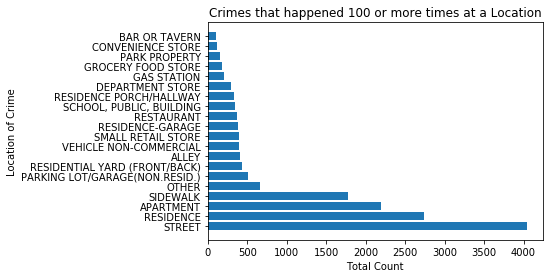

In [8]:
# Create seperate variables for the x/y variable
x_location_unique = df.Location_Description.unique()

# Creating a variable for locations appearing 100 times or more; as well as the dataframe for the variable
x_location_100 = df['Location_Description'].value_counts()[df['Location_Description'].value_counts()>100]
df_4 = pd.DataFrame(x_location_100)

# Renaming the column headers for the new dataframe
df_4.index.rename('Location_Description', inplace=True)
df_4.rename(columns={'Location_Description':'Total_Count'}, inplace=True)

# Creating a horizontal bar chart of locations that appeared 100 times or more
plt.barh(df_4.index.values, df_4['Total_Count'])
plt.xlabel('Total Count')
plt.ylabel('Location of Crime')
plt.title('Crimes that happened 100 or more times at a Location')

### Understanding if there are certain days that crimes tend to happen more often on ###

In [9]:
# Show the amount of crimes that happened on the day (total)
different_times = df['Date_Refurbished'].value_counts().head()
print(different_times)

2016-05-13    748
2016-05-06    735
2016-05-18    714
2016-05-16    714
2016-05-07    704
Name: Date_Refurbished, dtype: int64


#### Why is this weird? ####

When looking through our data, it seems that there are days that seem to have a lot of crimes be committed in a day, and then the next day there may be one. The conclusion that we have come to is that either the 'Date' that is listed as a column is the 'Date' that the crime was entered into the system, or that we could not load the entire data set into JupyterHub because it would crash the server.

### Time of Day that Crimes Occur ###

In [ ]:
# Creating a variable that will display the amount of crimes that occur at a certain time (Military Time)
different_hours = df['Time'].value_counts()

# Creating a new dataframe for the 'Time' column; renaming columns to appropriate titles
df_5 = pd.DataFrame(different_hours)
df_5.index.rename('Time',inplace=True)
df_5.rename(columns={'Time':'Total_Count'},inplace=True)

# Creating a scatter plot using df_5
plt.scatter(df_5.index.values, df_5['Total_Count'])
plt.style.use('seaborn')
plt.ylabel('Total Count')
plt.xlabel('Time')
plt.title('Total Crimes at Different Times')
plt.show()